In [1]:
from autumn.tools.project import get_project
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
# from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

from autumn.tools.plots.uncertainty.plots import _get_target_values, _plot_targets_to_axis

In [2]:
project = get_project("sm_sir", "national-capital-region")

In [3]:
# run baseline model
model_0 = project.run_baseline_model(project.param_set.baseline)
derived_df = model_0.get_derived_outputs_df()

In [5]:
# run scenarios
start_times = [
    sc_params.to_dict()["time"]["start"] for sc_params in project.param_set.scenarios
]
sc_models = project.run_scenario_models(model_0, project.param_set.scenarios, start_times=start_times)
derived_dfs = [m.get_derived_outputs_df() for m in sc_models]

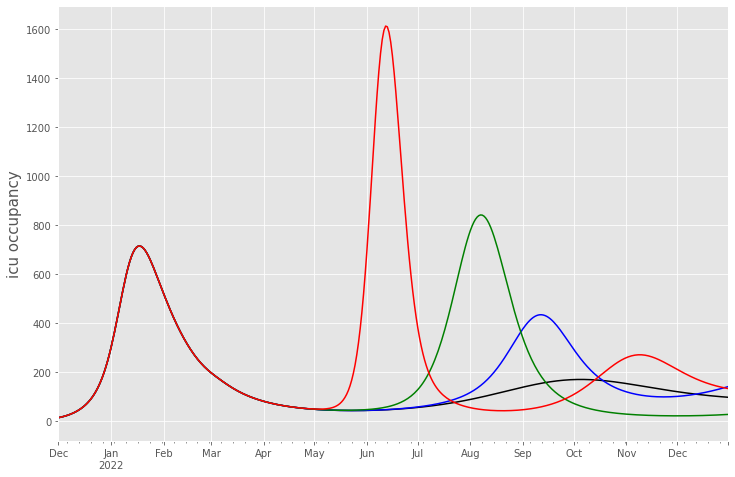

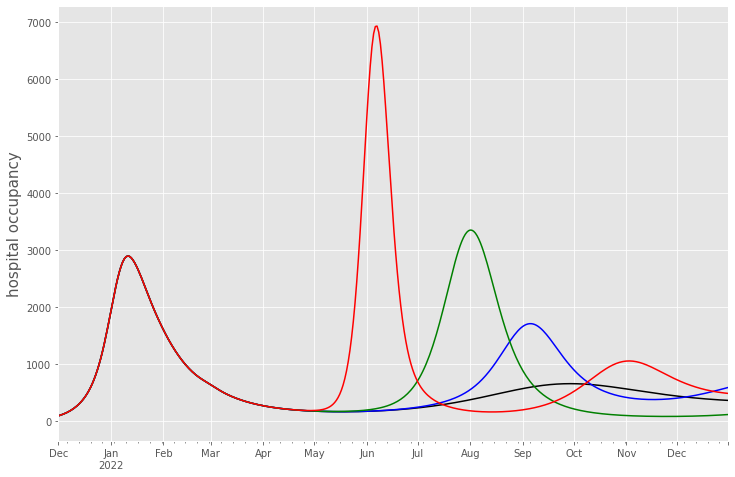

In [13]:
outputs = ["icu_occupancy", "hospital_occupancy"]

sc_colors = ["blue", "green", "red"]

for output in outputs:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()
    # axis = derived_df[output].plot()
    
    # plot baseline
    derived_df[output].plot(color="black")
    for i, d in enumerate(derived_dfs):       
        d[output].plot(color=sc_colors[i])
    #     axis.vlines(x=pd.Timestamp("2021-11-01"), ymin=0, ymax=max(d[output]), color="black", linestyle="dashed")
    axis.set_xlim((pd.Timestamp("2021-12-01"), pd.Timestamp("2022-12-31")))
    axis.set_ylabel(output.replace("_", " "), fontsize=15)

In [11]:
len(derived_dfs)

3